<a href="https://colab.research.google.com/github/aydawudu/NLP/blob/main/NLP(RNN_Multiple_Layer_GRU).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multiple Layer GRU

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

2.7.0


In [3]:
# Get the data
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteEN1TYC/imdb_reviews-train.tfrecord


  0%|          | 0/25000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteEN1TYC/imdb_reviews-test.tfrecord


  0%|          | 0/25000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteEN1TYC/imdb_reviews-unsupervised.tfrecord


  0%|          | 0/50000 [00:00<?, ? examples/s]

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [4]:
tokenizer=info.features['text'].encoder

In [5]:
buffer_size=10000
batch_size=64

train_dataset=train_dataset.shuffle(buffer_size)
train_dataset=train_dataset.padded_batch(batch_size, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset=test_dataset.padded_batch(batch_size, tf.compat.v1.data.get_output_shapes(test_dataset))

In [6]:
model=tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Conv1D(128,5,activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 64)          523840    
                                                                 
 conv1d (Conv1D)             (None, None, 128)         41088     
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 573,249
Trainable params: 573,249
Non-trainable params: 0
__________________________________________________

In [8]:
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

In [10]:
num_epochs=10
history =model.fit(train_dataset, epochs=num_epochs, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 57s 121ms/step - loss: 0.4432 - accuracy: 0.7867 - val_loss: 0.3280 - val_accuracy: 0.8633
Epoch 2/10
391/391 [==============================] - 23s 58ms/step - loss: 0.2268 - accuracy: 0.9148 - val_loss: 0.3009 - val_accuracy: 0.8777
Epoch 3/10
391/391 [==============================] - 20s 49ms/step - loss: 0.1747 - accuracy: 0.9352 - val_loss: 0.3405 - val_accuracy: 0.8717
Epoch 4/10
391/391 [==============================] - 18s 44ms/step - loss: 0.1416 - accuracy: 0.9502 - val_loss: 0.3714 - val_accuracy: 0.8668
Epoch 5/10
391/391 [==============================] - 17s 42ms/step - loss: 0.1167 - accuracy: 0.9606 - val_loss: 0.4316 - val_accuracy: 0.8642
Epoch 6/10
391/391 [==============================] - 17s 41ms/step - loss: 0.0975 - accuracy: 0.9675 - val_loss: 0.4750 - val_accuracy: 0.8602
Epoch 7/10
391/391 [==============================] - 17s 41ms/step - loss: 0.0785 - accuracy: 0.9754 - val_loss: 0.5394 - val_accuracy

In [13]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

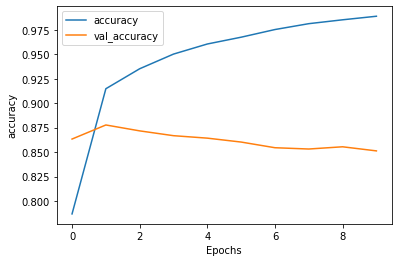

In [14]:
plot_graphs(history, 'accuracy')

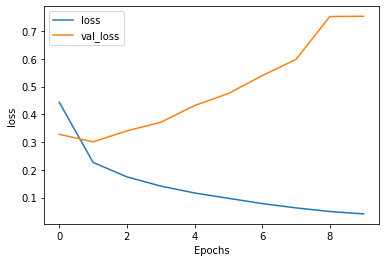

In [15]:
plot_graphs(history,'loss')